In [6]:
import os
import numpy as np
import math
os.environ["NUMBA_ENABLE_CUDASIM"] = "1"
from numba import jit, njit, vectorize, cuda

## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [18]:
A = [2, 5, 10, 3, 8]
arr_A = np.array(A)
print(np.log(arr_A))
print(np.exp(arr_A))

[0.69314718 1.60943791 2.30258509 1.09861229 2.07944154]
[7.38905610e+00 1.48413159e+02 2.20264658e+04 2.00855369e+01
 2.98095799e+03]


## Exerice 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

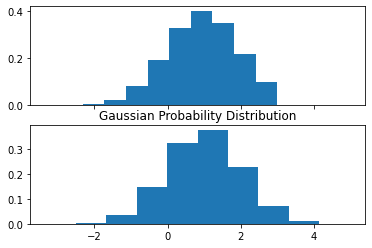

In [32]:
import matplotlib.pyplot as plt
import scipy.stats as stats

lower, upper = -3, 3
mu, sigma = 1, 1
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
N = stats.norm(loc=mu, scale=sigma)

fig, ax = plt.subplots(2, sharex=True)
ax[0].hist(X.rvs(100000), density=True)
ax[1].hist(N.rvs(100000), density=True)
plt.title("Gaussian Probability Distribution")
plt.show()

## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

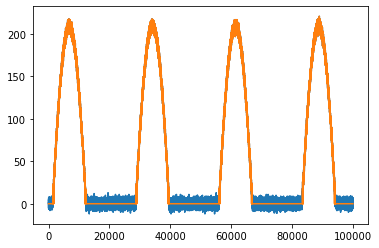

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)
#print(data)
plt.plot(data)
threshold = 15

#put your code here
def zero_suppression(data, threshold):
    ans = np.zeros_like(data)
    select = np.abs(data) >= threshold
    ans[select] = data[select]
    return ans
plt.plot(zero_suppression(data, threshold))
#print(numpy_zero_suppression(data, threshold))

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [41]:
import sklearn
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

X = np.random.rand(3,3)
Y = np.random.rand(3,3)
sklearn.metrics.pairwise.sigmoid_kernel(X, Y, gamma=None, coef0=1)

array([[0.85106233, 0.84980995, 0.86446084],
       [0.85672035, 0.84146438, 0.86859307],
       [0.91874209, 0.90153699, 0.91770627]])

## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

In [10]:
from numba import cuda
import numpy
import math

# CUDA kernel
@cuda.jit
def double_kernel_3D(io_array):
    x, y, z = cuda.grid(3)
    if x < io_array.shape[0] and y < io_array.shape[1] and z < io_array.shape[2]:
        io_array[x][y][z] *= 3 # do the computation

# Host code   
data = numpy.ones((256,256,256))

# Configure the blocks
threadsperblock = (32,8) #ThreadsPerBlock must be a divisor of the data dimension: 256 / 32 / 8 = 1
blockspergrid_x = int(math.ceil(data.shape[0] / threadsperblock[0]))
blockspergrid_y = int(math.ceil(data.shape[1] / threadsperblock[1]))
blockspergrid_z = int(math.ceil(data.shape[2] / threadsperblock[2]))
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

double_kernel_3D[blockspergrid, threadsperblock](data)
print(data)

IndexError: tuple index out of range

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.


In [ ]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

# Initialize the data arrays
A = 
B = 

# Configure the blocks
threadsperblock = 
blockspergrid_x = 
blockspergrid_y = 
blockspergrid = 

